EE258 Project1 code

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
# load the data 
cifar10 = tf.keras.datasets.cifar10

In [5]:
type(cifar10)

module

In [6]:
# load the test and training data into seperate variables
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 25s 0us/step


In [7]:
# Print the shapr of the training data and test data
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


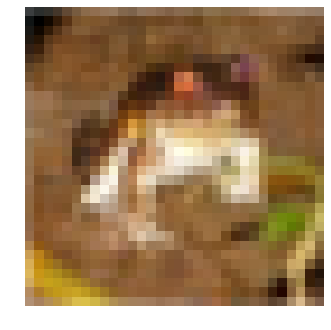

In [9]:
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

**Developing a baseline model**

Choosing 3072 - 256 - 256 - 10 MLP model with ReLU and Softmax activation for baseline.

In [0]:
# Creating a feed forward model 
model = tf.keras.models.Sequential()

# Flatten the image by taking 32*32*3 inputs
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))

# create a model with 3 hidden layers 328, 328 and 42 neurons respectively
# use relu activation function in all the neurons 
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))

# use softmax activation function in the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [0]:
# compile using stochastic gradient descent optimizer
# use sparse_categorical_crossentropy as a metric for loss
# use accuracy as a metric
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# model fitting
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 15s 298us/step - loss: 14.5052 - acc: 0.1001
Epoch 2/5
50000/50000 [==============================] - 14s 290us/step - loss: 14.5063 - acc: 0.1000
Epoch 3/5
50000/50000 [==============================] - 15s 291us/step - loss: 14.5063 - acc: 0.1000
Epoch 4/5
50000/50000 [==============================] - 15s 292us/step - loss: 14.5063 - acc: 0.1000
Epoch 5/5
50000/50000 [==============================] - 15s 290us/step - loss: 14.5063 - acc: 0.1000


As we can see the accuracy is constantly low. One reason of this might be that we have not normalized our data. Let's do so and observe what happens.

In [0]:
# normalizing
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

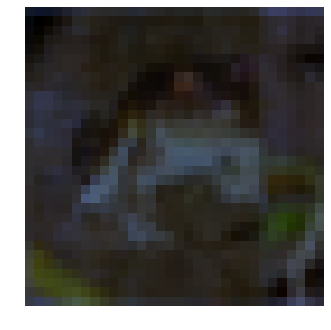

In [21]:
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

Lets see the performance of the same model on normalized data.

The model is already built and compiled so lets just fit it.

In [22]:
# model fitting
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 16s 314us/step - loss: 2.1894 - acc: 0.1934
Epoch 2/5
50000/50000 [==============================] - 15s 304us/step - loss: 2.0478 - acc: 0.2617
Epoch 3/5
50000/50000 [==============================] - 15s 303us/step - loss: 1.9817 - acc: 0.2944
Epoch 4/5
50000/50000 [==============================] - 15s 302us/step - loss: 1.9240 - acc: 0.3205
Epoch 5/5
50000/50000 [==============================] - 15s 297us/step - loss: 1.8724 - acc: 0.3397


As we can see good improvement per epoch let's increase number of epoch to see the performance of our model.

In [23]:
# improving the same model
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
50000/50000 [==============================] - 15s 295us/step - loss: 1.8295 - acc: 0.3559
Epoch 2/25
50000/50000 [==============================] - 15s 298us/step - loss: 1.7938 - acc: 0.3683
Epoch 3/25
50000/50000 [==============================] - 15s 304us/step - loss: 1.7637 - acc: 0.3789
Epoch 4/25
50000/50000 [==============================] - 15s 304us/step - loss: 1.7338 - acc: 0.3901
Epoch 5/25
50000/50000 [==============================] - 16s 319us/step - loss: 1.7092 - acc: 0.3988
Epoch 6/25
50000/50000 [==============================] - 16s 319us/step - loss: 1.6885 - acc: 0.4054
Epoch 7/25
50000/50000 [==============================] - 15s 301us/step - loss: 1.6675 - acc: 0.4132
Epoch 8/25
50000/50000 [==============================] - 16s 311us/step - loss: 1.6470 - acc: 0.4211
Epoch 9/25
50000/50000 [==============================] - 15s 298us/step - loss: 1.6287 - acc: 0.4279
Epoch 10/25
50000/50000 [==============================] - 15s 306us/step - loss: 

So we can say that we have got a baseline training performance. But let's see how our network performs on unseen data to verify that our model hasn't just memorized.

In [24]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 140us/step
1.6169710195541382
0.4251


As we can see that training accuracy and test accuracy close to each other we can say that we are not overfitting the network and improve its performance.

**Improving the model**

Lets start playing with the parameters. Lets change number of neurons, number of layers, learning rate, momentum, activation functions, batch size etc. 

If we want to have all possible permutations and combinations it will take forever, so we are choosing random values of parameters with constraint that no parameter values are close. e.g. model1 = 3 layers (3072 - 512 - 10) with activations functions tanh, softmax. while model2 = 5 layers (3072 - 384 - 384 - 48 - 10) with activation functions ReLU and softmax, adam optimizer. etc

We are also keeping a few parameters constant like activation function of output layer to be softmax. We are also keeping number of epochs to be 30 for comparing perfomance of different models after the same number of iterations. 

In [0]:
# Lets calculate f1 score

# Formula for f score is ----> F(β)=(1+β^2)⋅(PR/(ββP+R))

def f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, "int32")
    y_pred = tf.cast(tf.round(y_pred), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_pred
    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    precision = sum_correct / sum_pred
    recall = sum_correct / sum_true
    f_score = 2 * precision * recall / (precision + recall)
    f_score = tf.where(tf.is_nan(f_score), tf.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)


**Model_1**

In [0]:
# model_1
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model_1.add(tf.keras.layers.Dense(512, activation=tf.nn.tanh))
model_1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model_1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_score])

In [38]:
model_1.fit(x_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 25s 502us/step - loss: 2.1148 - acc: 0.2351 - f1_score: 0.0093
Epoch 2/5
50000/50000 [==============================] - 24s 484us/step - loss: 2.0216 - acc: 0.2877 - f1_score: 0.0387
Epoch 3/5
50000/50000 [==============================] - 24s 483us/step - loss: 1.9844 - acc: 0.3042 - f1_score: 0.0622
Epoch 4/5
50000/50000 [==============================] - 24s 483us/step - loss: 1.9569 - acc: 0.3160 - f1_score: 0.0786
Epoch 5/5
50000/50000 [==============================] - 24s 489us/step - loss: 1.9360 - acc: 0.3269 - f1_score: 0.0927


Wonderful! Now that we have calculated f1 score, lets run this model for 30 epochs

In [39]:
model_1.fit(x_train, y_train, epochs=25)

Epoch 1/25
50000/50000 [==============================] - 25s 494us/step - loss: 1.9197 - acc: 0.3362 - f1_score: 0.1095
Epoch 2/25
50000/50000 [==============================] - 24s 488us/step - loss: 1.9045 - acc: 0.3414 - f1_score: 0.1209
Epoch 3/25
50000/50000 [==============================] - 24s 489us/step - loss: 1.8929 - acc: 0.3463 - f1_score: 0.1321
Epoch 4/25
50000/50000 [==============================] - 25s 495us/step - loss: 1.8821 - acc: 0.3505 - f1_score: 0.1373
Epoch 5/25
50000/50000 [==============================] - 24s 489us/step - loss: 1.8727 - acc: 0.3558 - f1_score: 0.1471
Epoch 6/25
50000/50000 [==============================] - 24s 488us/step - loss: 1.8640 - acc: 0.3590 - f1_score: 0.1529
Epoch 7/25
50000/50000 [==============================] - 24s 489us/step - loss: 1.8562 - acc: 0.3616 - f1_score: 0.1599
Epoch 8/25
50000/50000 [==============================] - 25s 490us/step - loss: 1.8472 - acc: 0.3652 - f1_score: 0.1644
Epoch 9/25
50000/50000 [========

**Model_2**


In [0]:
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model_2.add(tf.keras.layers.Dense(384, activation=tf.nn.relu))
model_2.add(tf.keras.layers.Dense(384, activation=tf.nn.relu))
model_2.add(tf.keras.layers.Dense(48, activation=tf.nn.relu))
model_2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',f1_score])

In [41]:
model_2.fit(x_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 36s 718us/step - loss: 2.0469 - acc: 0.2485 - f1_score: 0.0670
Epoch 2/5
50000/50000 [==============================] - 35s 704us/step - loss: 1.8663 - acc: 0.3294 - f1_score: 0.1675
Epoch 3/5
50000/50000 [==============================] - 36s 727us/step - loss: 1.7910 - acc: 0.3602 - f1_score: 0.2277
Epoch 4/5
50000/50000 [==============================] - 36s 713us/step - loss: 1.7387 - acc: 0.3777 - f1_score: 0.2765
Epoch 5/5
50000/50000 [==============================] - 36s 712us/step - loss: 1.6958 - acc: 0.3964 - f1_score: 0.3145


This model looks promising. Just after 5 iterarations the accuracy is almost 40%.  

In [42]:
model_2.fit(x_train, y_train, epochs=25)

Epoch 1/25
50000/50000 [==============================] - 36s 714us/step - loss: 1.6640 - acc: 0.4060 - f1_score: 0.3494
Epoch 2/25
50000/50000 [==============================] - 35s 706us/step - loss: 1.6366 - acc: 0.4180 - f1_score: 0.3757
Epoch 3/25
50000/50000 [==============================] - 35s 706us/step - loss: 1.6096 - acc: 0.4277 - f1_score: 0.3985
Epoch 4/25
50000/50000 [==============================] - 35s 703us/step - loss: 1.5884 - acc: 0.4351 - f1_score: 0.4181
Epoch 5/25
50000/50000 [==============================] - 35s 709us/step - loss: 1.5612 - acc: 0.4447 - f1_score: 0.4387
Epoch 6/25
50000/50000 [==============================] - 36s 716us/step - loss: 1.5409 - acc: 0.4504 - f1_score: 0.4564
Epoch 7/25
50000/50000 [==============================] - 38s 755us/step - loss: 1.5187 - acc: 0.4589 - f1_score: 0.4778
Epoch 8/25
50000/50000 [==============================] - 36s 718us/step - loss: 1.5036 - acc: 0.4646 - f1_score: 0.4923
Epoch 9/25
50000/50000 [========

We can say that this model is better than our baseline model. Let's verify it using different validation splits.

The model is same but we are going to perform different validation splits on it.


In [46]:
model_2.fit(x_train, y_train, validation_split = 0.2, epochs=3)

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 32s 790us/step - loss: 1.2646 - acc: 0.5487 - f1_score: 0.7100 - val_loss: 1.2399 - val_acc: 0.5576 - val_f1_score: 0.7009
Epoch 2/3
40000/40000 [==============================] - 30s 747us/step - loss: 1.2463 - acc: 0.5562 - f1_score: 0.7327 - val_loss: 1.2819 - val_acc: 0.5382 - val_f1_score: 0.7161
Epoch 3/3
40000/40000 [==============================] - 30s 746us/step - loss: 1.2376 - acc: 0.5603 - f1_score: 0.7397 - val_loss: 1.2899 - val_acc: 0.5414 - val_f1_score: 0.7253


Lets change the size of validation set.

In [47]:
model_2.fit(x_train, y_train, validation_split = 0.33, epochs=3)

Train on 33500 samples, validate on 16500 samples
Epoch 1/3
33500/33500 [==============================] - 26s 776us/step - loss: 1.2184 - acc: 0.5671 - f1_score: 0.7514 - val_loss: 1.3357 - val_acc: 0.5230 - val_f1_score: 0.7053
Epoch 2/3
33500/33500 [==============================] - 27s 793us/step - loss: 1.2021 - acc: 0.5720 - f1_score: 0.7661 - val_loss: 1.2853 - val_acc: 0.5434 - val_f1_score: 0.7353
Epoch 3/3
33500/33500 [==============================] - 26s 785us/step - loss: 1.1855 - acc: 0.5796 - f1_score: 0.7805 - val_loss: 1.3040 - val_acc: 0.5338 - val_f1_score: 0.7406


We can see that as we changed validation split from 0.2 to 0.33 difference between accuracy and validation accuracy increased. Therefore, We can say that validation split of 0.2 is better than 0.33. 

Let's go to project part 2 now.